<a href="https://colab.research.google.com/github/Jumas-Cola/Neural_Networks_and_CV/blob/master/PyTorch_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import random
import numpy as np

def determinate_notebook():
  random.seed(0)
  np.random.seed(0)
  torch.manual_seed(0)
  torch.cuda.manual_seed(0)
  torch.backends.cudnn.deterministic = True

determinate_notebook()

In [0]:
import torchvision.datasets

MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [0]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [0]:
len(y_train), len(y_test)

(60000, 10000)

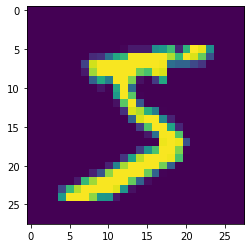

In [0]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :])
plt.show()

In [0]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [0]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [0]:
X_train.shape, X_test.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

In [0]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = torch.nn.Conv2d(
        in_channels=1, out_channels=6, kernel_size=5, padding=2)
    self.act1 = torch.nn.ReLU()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

    self.conv2 = torch.nn.Conv2d(
        in_channels=6, out_channels=16, kernel_size=5, padding=0)
    self.act2 = torch.nn.ReLU()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

    self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
    self.act3 = torch.nn.ReLU()

    self.fc2 = torch.nn.Linear(120, 120)
    self.act4 = torch.nn.ReLU()

    self.fc3 = torch.nn.Linear(120, 84)
    self.act5 = torch.nn.ReLU()

    self.fc4 = torch.nn.Linear(84, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)

    x= x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

    x = self.fc1(x)
    x = self.act3(x)

    x = self.fc2(x)
    x = self.act4(x)

    x = self.fc3(x)
    x = self.act5(x)

    x = self.fc4(x)

    return x

lenet5 = LeNet5()

In [0]:
!nvidia-smi

Mon Feb 17 12:56:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [0]:
batch_size = 1000

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

import time

start_time = time.time()

for epoch in range(200):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    preds = lenet5.forward(X_batch)

    loss_value = loss(preds, y_batch)
    loss_value.backward()

    optimizer.step()

  test_preds = lenet5.forward(X_test)
  test_loss_history.append(loss(test_preds, y_test).data.cpu())

  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
  test_accuracy_history.append(accuracy)

  print(accuracy)

print('Training time (100 epoches): ', time.time() - start_time)


tensor(0.9493)
tensor(0.9750)
tensor(0.9777)
tensor(0.9830)
tensor(0.9866)
tensor(0.9840)
tensor(0.9838)
tensor(0.9844)
tensor(0.9898)
tensor(0.9888)
tensor(0.9897)
tensor(0.9876)
tensor(0.9904)
tensor(0.9891)
tensor(0.9886)
tensor(0.9911)
tensor(0.9895)
tensor(0.9903)
tensor(0.9894)
tensor(0.9889)
tensor(0.9909)
tensor(0.9903)
tensor(0.9902)
tensor(0.9904)
tensor(0.9879)
tensor(0.9910)
tensor(0.9903)
tensor(0.9907)
tensor(0.9907)
tensor(0.9908)
tensor(0.9886)
tensor(0.9889)
tensor(0.9893)
tensor(0.9887)
tensor(0.9899)
tensor(0.9906)
tensor(0.9906)
tensor(0.9893)
tensor(0.9896)
tensor(0.9897)
tensor(0.9907)
tensor(0.9900)
tensor(0.9904)
tensor(0.9888)
tensor(0.9863)
tensor(0.9896)
tensor(0.9903)
tensor(0.9910)
tensor(0.9905)
tensor(0.9903)
tensor(0.9891)
tensor(0.9913)
tensor(0.9917)
tensor(0.9914)
tensor(0.9916)
tensor(0.9914)
tensor(0.9917)
tensor(0.9924)
tensor(0.9917)
tensor(0.9900)
tensor(0.9895)
tensor(0.9889)
tensor(0.9895)
tensor(0.9906)
tensor(0.9914)
tensor(0.9908)
tensor(0.9

In [0]:
lenet5.forward(X_test)

tensor([[-24.5792,  -0.9422,  -6.5050,  ...,  39.7036, -16.6172,  -5.9070],
        [ -0.6777,  -7.6085,  57.7273,  ..., -15.2132, -19.7789, -46.3135],
        [ -2.9544,  39.7864,  -7.2729,  ...,  -8.7876,  -2.5454, -18.9504],
        ...,
        [-57.0085,  -1.3239,  -8.2902,  ..., -16.8713,  -4.2614,  -0.8456],
        [-25.0928,   4.6595, -29.0618,  ..., -42.3006,   9.6195,  -6.7059],
        [  0.0750, -30.5944,  -3.4810,  ..., -38.5124,  -7.0422, -14.2107]],
       device='cuda:0', grad_fn=<AddmmBackward>)

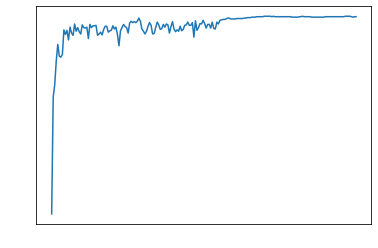

In [0]:
plt.plot(test_accuracy_history);
# plt.plot(test_loss_history)
plt.tick_params(colors='w')